In [119]:
%matplotlib inline

import stumpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import dtale

import wrangle as wg
import scipy.stats as stats

plt.rcParams["figure.figsize"] = [20,6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = wg.get_dow()
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [3]:
df = wg.prep_DOW(df)
df.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-04,2,IBM,161.54,164.42,161.12,164.27,19081936,1.68998,-24.820375,25381792.0,164.42,164.05,-0.225033,35,0.456565
2011-01-04,2,TRV,59.09,60.01,58.37,59.71,16608737,1.04925,17.569654,14126721.0,59.83,59.58,-0.417851,68,0.686652
2011-01-04,2,KO,65.20,67.48,65.03,67.22,39265955,3.09816,31.529107,29853434.0,67.22,67.27,0.074383,73,0.699197
2011-01-04,2,XOM,83.86,84.94,82.61,84.68,77569311,0.97782,-6.951645,83364516.0,84.26,85.95,2.005700,40,0.555031
2011-01-04,2,PG,61.08,62.30,60.61,62.08,43453701,1.63720,5.084613,41351155.0,62.17,61.90,-0.434293,26,0.853737


In [11]:
df.isnull().sum()

quarter                                0
stock                                  0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

### not a lot of data to work with so will only be train/test splitting

In [101]:
# set train size to be 50% of total 
train_size = int(round(df_ibm.shape[0] * 0.8))
train_size

20

In [102]:
# set test size to be number of rows remaining. 
test_size = int(round(df_ibm.shape[0] * 0.2))
test_size

5

In [103]:
len(df_ibm) == train_size + test_size

True

In [113]:
train = df_ibm[:train_size]
train.shape

(20, 15)

In [114]:
test = df_ibm[train_size:]
test.shape

(5, 15)

In [115]:
len(train) + len(test) == len(df_ibm)

True

In [43]:
def quick_group(x,y):
    group_single = df.groupby(x).agg({y:['mean','min','max']})
    group_single.columns = ['mean','min','max']
    group_single = group_single.reset_index()
    return print(group_single.sort_values(by='mean', ascending=False))

In [34]:
def group_stock_and_(x):
    group_single = df.groupby('stock').agg({x:['mean','min','max']})
    group_single.columns = ['mean','min','max']
    group_single = group_single.reset_index()
    return print(group_single.sort_values(by='mean'))

In [44]:
quick_group('date', 'percent_change_price')

         date      mean       min       max
13 2011-04-29  2.451867  -1.68047  8.329430
9  2011-04-02  2.099038  -1.20156  6.102250
12 2011-04-21  1.975618  -2.60827  9.882230
8  2011-03-25  1.495959  -6.05634  4.339170
1  2011-01-14  1.322282  -8.13204  7.621740
4  2011-02-18  0.994382  -1.91728  4.347830
23 2011-11-02  0.922095 -15.42290  6.397060
0  2011-01-04  0.831334  -3.52250  5.513440
16 2011-05-27  0.769748  -3.09773  3.878580
20 2011-07-01  0.533190  -4.92066  6.797730
21 2011-08-04  0.170317  -3.45495  3.762490
2  2011-01-21  0.156960  -5.50398  4.004210
18 2011-06-17  0.122466  -3.72793  3.197850
10 2011-04-03 -0.174938  -2.77257  3.746700
19 2011-06-24 -0.180597  -3.65062  4.969700
14 2011-05-13 -0.372538  -4.15512  3.194320
3  2011-01-28 -0.597219  -4.75570  3.819160
15 2011-05-20 -0.635752 -10.49750  3.581550
11 2011-04-15 -0.714650  -8.52713  5.137090
24 2011-11-03 -1.104409  -4.33364  1.824690
7  2011-03-18 -1.168365  -4.08673  3.753210
17 2011-06-05 -1.317455  -6.1407

# Big Q: regression or Time Series?



# Who are the top performers by mean for percent change price?

In [45]:
quick_group('stock', 'percent_change_price')

   stock      mean       min      max
22   PFE  0.591685  -3.41018  6.10225
12   IBM  0.587680  -3.27004  3.79122
17  KRFT  0.544360  -2.73973  5.13709
1    AXP  0.521029  -4.75570  6.34668
7     DD  0.362452  -5.43437  4.96970
6    CVX  0.340060  -6.02850  3.67084
26   UTX  0.306830  -4.32184  5.44794
14   JNJ  0.270470  -4.07609  5.98842
2     BA  0.253427  -3.80463  5.65488
29   XOM  0.240347  -6.14075  4.20420
19   MMM  0.207030  -3.56194  4.11705
18   MCD  0.196842  -4.08673  2.71145
13  INTC  0.188712  -3.78054  9.88223
8    DIS  0.175203  -6.01432  6.39706
4    CAT  0.152660  -5.07571  5.64811
25   TRV  0.110706  -4.92066  3.53501
10    HD  0.108416  -5.64885  5.06440
16    KO  0.081142  -4.49302  3.31063
28   WMT  0.079834  -3.82828  2.57463
24     T  0.059002  -3.40829  5.51344
23    PG -0.017015  -2.97628  3.48275
20   MRK -0.020566  -8.13204  6.67656
15   JPM -0.070105  -4.48936  4.34783
27    VZ -0.124289  -3.46789  2.75107
9     GE -0.240471  -4.36992  4.00421
0     AA -0.

## Top 5 by _percent change price_


1. PFE

2. IBM

3. KRFT

4. AXP

5. DD

# Who has the top _Volume_ by mean

In [46]:
quick_group('stock', 'volume')

   stock          mean        min         max
3    BAC  7.229991e+08  458423511  1453438639
5   CSCO  3.586616e+08  154708263  1000362015
13  INTC  2.990224e+08  201181541   513891027
21  MSFT  2.896988e+08  158547201   554889924
9     GE  2.639381e+08  158691572   520516218
22   PFE  2.274670e+08  143338656   457640533
15   JPM  1.511090e+08  107332185   234547885
24     T  1.322873e+08   73854767   384284485
0     AA  1.296388e+08   77152591   242963398
11   HPQ  9.485843e+07   46244533   217523955
29   XOM  9.368949e+07   43378708   129743696
27    VZ  7.838518e+07   37735134   141938064
20   MRK  7.677384e+07   46564832   131132702
14   JNJ  5.600611e+07   33273371    86229071
28   WMT  5.572143e+07   23073491    92696912
23    PG  4.865309e+07   29487333    70042160
10    HD  4.820505e+07   24190528    76297124
8    DIS  4.744367e+07   24312043    83975520
17  KRFT  4.481617e+07   24955086    71530535
6    CVX  3.857983e+07   18873837    57897831
16    KO  3.855617e+07   19831270 

## Top 5 by _Volume_

1. BAC

2. CSCO

3. INTC

4. MSFT

5. GE

6. PFE (HONORABLE MENTION)

# Who are the highest valued stocks?

In [63]:
print('OPEN\n')
quick_group('stock', 'open'),
print('n'),
print('------------------------------------'),
print('------------------------------------'),
print('CLOSE\n'),


quick_group('stock', 'close')

OPEN

   stock      mean     min     max
12   IBM  162.2024  147.00  172.11
4    CAT  103.0672   92.71  116.24
6    CVX  100.8808   90.95  109.74
19   MMM   91.5300   85.70   97.58
26   UTX   83.7964   78.27   90.03
29   XOM   81.9584   73.72   88.10
18   MCD   77.1220   73.50   82.32
2     BA   73.2972   66.15   80.35
16    KO   65.2824   62.32   68.10
23    PG   64.0188   60.96   66.80
14   JNJ   62.4644   58.67   67.31
25   TRV   59.1104   53.12   63.56
28   WMT   53.8724   51.73   56.45
7     DD   52.7068   48.30   56.42
1    AXP   46.4880   43.30   51.39
15   JPM   44.5328   40.50   47.20
11   HPQ   41.7368   34.79   48.45
8    DIS   41.1944   37.74   43.53
10    HD   36.5332   33.46   39.30
27    VZ   36.5208   34.88   38.53
20   MRK   34.3800   32.09   37.26
17  KRFT   32.3836   30.53   34.97
24     T   29.6128   27.42   31.60
21  MSFT   26.0464   23.79   28.20
13  INTC   21.4044   19.53   23.32
9     GE   19.8344   18.31   21.51
22   PFE   19.7160   17.70   21.14
5   CSCO   18.

## The highest valued stocks are:

1. IBM

2. CAT

3. CVM

4. MMM

5. UTX

In [65]:
def fast_pearson(x,y):
    alpha = .05

    corr, p = stats.pearsonr(x, y)

    corr, p
    print(f'correlation is {corr}')
    print(f'P-value is {p}')
    if p < alpha:
        print("We reject the null hypothesis")
        print("we have confidence that there is a correlation")
    else:
        print("We fail to reject the null")

# is there a correlation between percent change and next week percent change?

In [74]:
fast_pearson(df.percent_change_next_weeks_price, df.percent_change_price)

correlation is 0.019955361311178362
P-value is 0.5853114447246122
We fail to reject the null


### is there a relationship between open and percent_change_price?

In [75]:
fast_pearson(df.open, df.percent_change_price)

correlation is 0.061484842767567195
P-value is 0.09244956969686441
We fail to reject the null


there is not a significant relationship between open and percent change

### is there a relationship between open and close?

In [76]:
fast_pearson(df.open, df.close)

correlation is 0.9990440343201461
P-value is 0.0
We reject the null hypothesis
we have confidence that there is a correlation


it seems there is a relationship between open and close

### is there a relationship between open and days to next dividend?

In [184]:
fast_pearson(df.open, df.days_to_next_dividend)

correlation is -0.06522768160574915
P-value is 0.07421986641592808
We fail to reject the null


there is not a significant relationshipp between open and days to next dividend

### is there a relationship between open and percent_return_next_dividend?

In [78]:
fast_pearson(df.open, df.percent_return_next_dividend)

correlation is -0.14600119269090486
P-value is 5.9885346324239936e-05
We reject the null hypothesis
we have confidence that there is a correlation


it seems there is a significant rrelationship between open and percent return next dividend

In [79]:
df.head(1)

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-04,2,IBM,161.54,164.42,161.12,164.27,19081936,1.68998,-24.820375,25381792.0,164.42,164.05,-0.225033,35,0.456565


In [83]:
df = df.backfill()

In [84]:
df.isnull().sum()

quarter                               0
stock                                 0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
dtype: int64

In [87]:
dfaa = dfaa.dropna()

In [89]:
dtale.show(dfaa)

In [90]:
df.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-04,2,IBM,161.54,164.42,161.12,164.27,19081936,1.68998,-24.820375,25381792.0,164.42,164.05,-0.225033,35,0.456565
2011-01-04,2,TRV,59.09,60.01,58.37,59.71,16608737,1.04925,17.569654,14126721.0,59.83,59.58,-0.417851,68,0.686652
2011-01-04,2,KO,65.20,67.48,65.03,67.22,39265955,3.09816,31.529107,29853434.0,67.22,67.27,0.074383,73,0.699197
2011-01-04,2,XOM,83.86,84.94,82.61,84.68,77569311,0.97782,-6.951645,83364516.0,84.26,85.95,2.005700,40,0.555031
2011-01-04,2,PG,61.08,62.30,60.61,62.08,43453701,1.63720,5.084613,41351155.0,62.17,61.90,-0.434293,26,0.853737


# Big A: Time series

In [94]:
# top 1 for price of stock / # 2 for percent change mean
df_ibm = df.where(df['stock'] == 'IBM')
df_ibm = df_ibm.dropna()

# top 1 for % change mean
df_pfe = df.where(df['stock'] == 'PFE')
df_pfe = df_pfe.dropna()

# top 1 for volume
df_bac = df.where(df['stock'] == 'BAC')
df_bac = df_bac.dropna()


# frankly, not enough data was in this DF but alas, we'll see how it goes
df_ibm.shape, df_pfe.shape, df_bac.shape

((25, 15), (25, 15), (25, 15))

In [95]:
df_ibm.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-04,2.0,IBM,161.54,164.42,161.12,164.27,19081936.0,1.689980,-24.820375,25381792.0,164.42,164.05,-0.225033,35.0,0.456565
2011-01-14,1.0,IBM,147.00,150.00,146.00,150.00,15335348.0,2.040820,-34.723320,23492843.0,149.82,155.50,3.791220,25.0,0.433333
2011-01-21,1.0,IBM,149.82,156.78,149.38,155.50,35770931.0,3.791220,133.258032,15335348.0,155.42,159.21,2.438550,18.0,0.418006
2011-01-28,1.0,IBM,155.42,164.35,155.33,159.21,32510483.0,2.438550,-9.114798,35770931.0,159.18,164.00,3.028020,11.0,0.408266
2011-02-18,1.0,IBM,164.18,164.84,162.52,164.84,14352613.0,0.401998,-45.023370,26106753.0,163.57,162.28,-0.788653,77.0,0.454987


In [112]:
qtrcnt = df_ibm.where(df_ibm['quarter'] == 2.0)
qtr = qtrcnt.dropna()
qtr.shape

(13, 15)

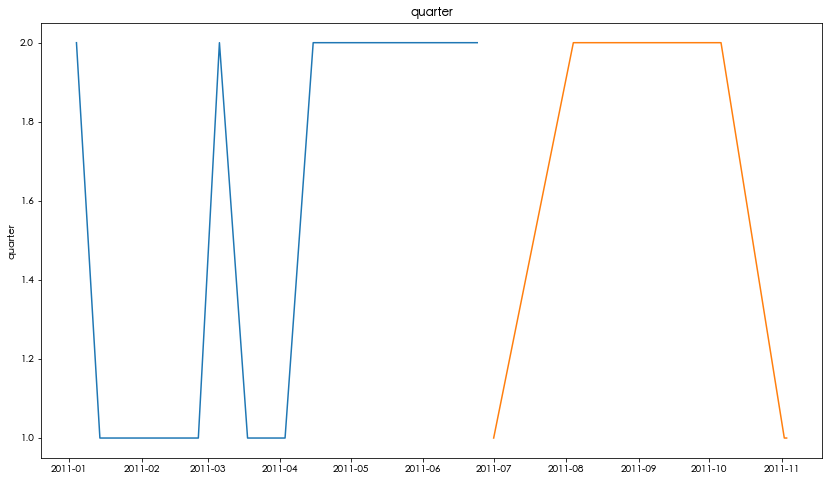

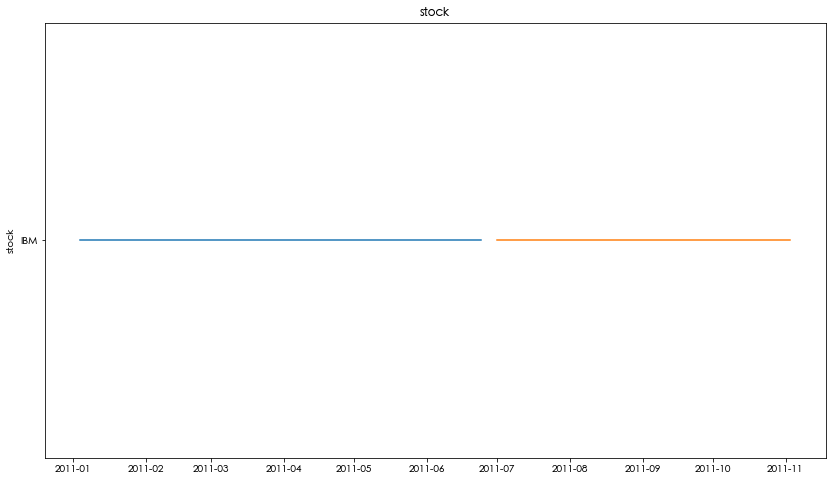

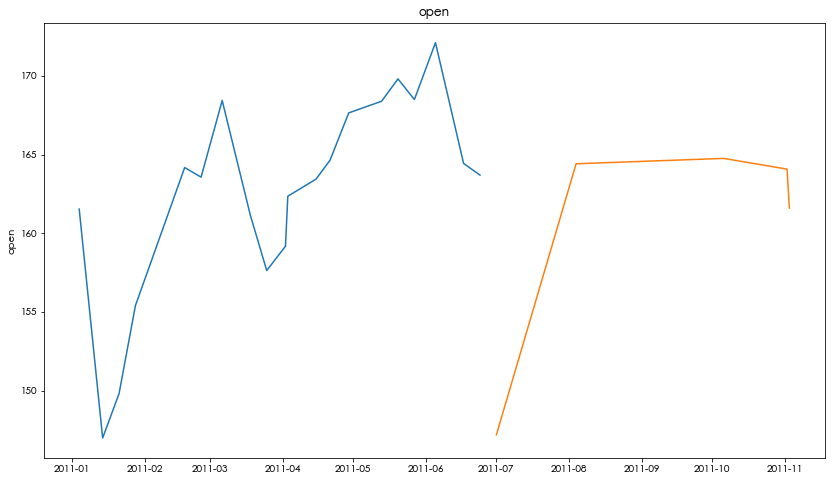

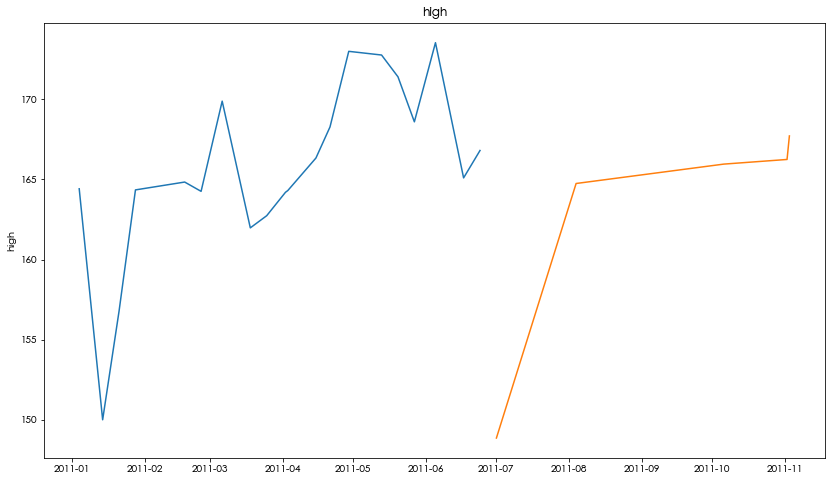

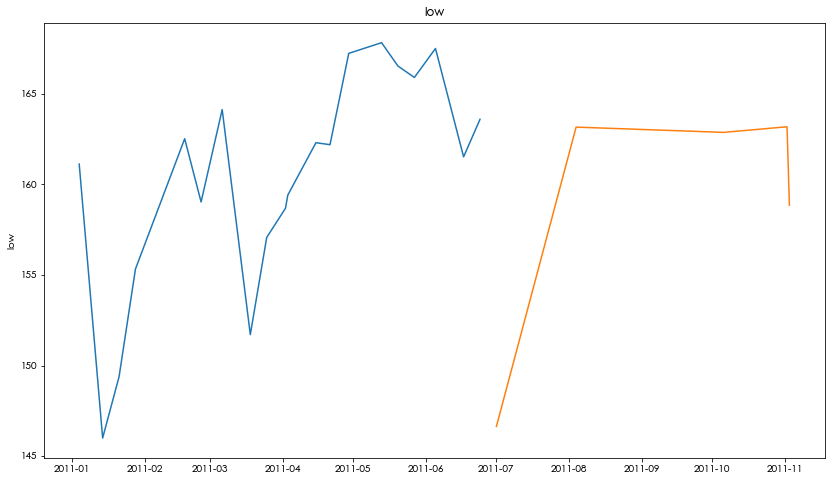

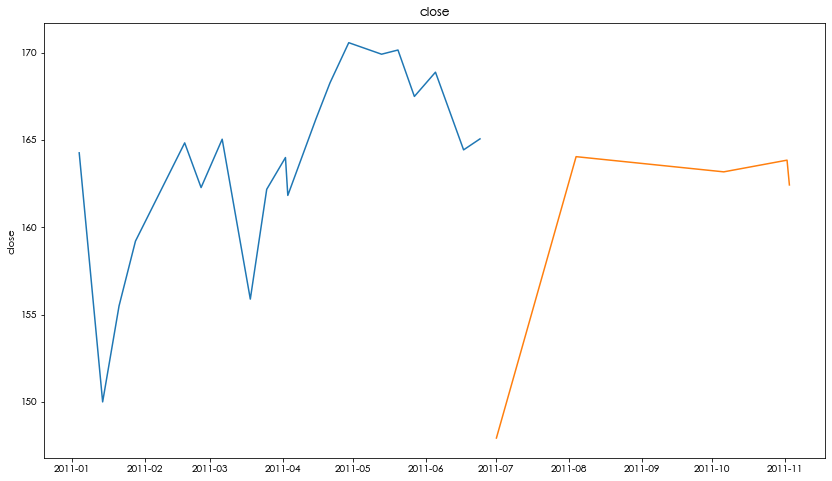

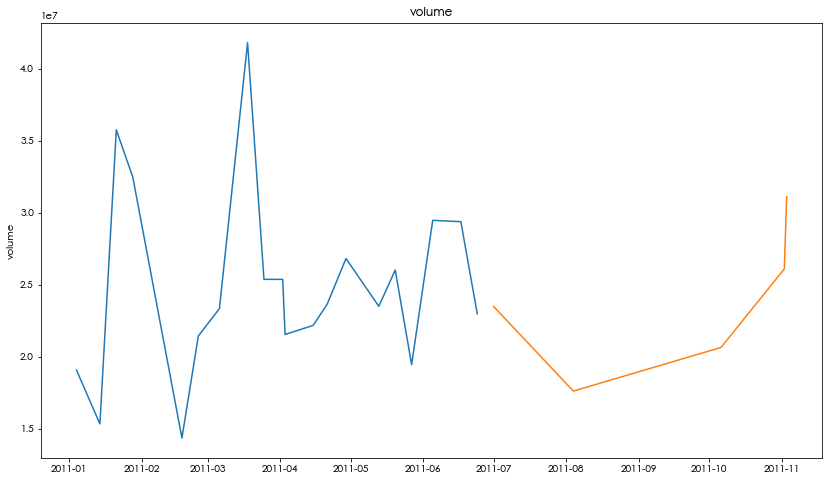

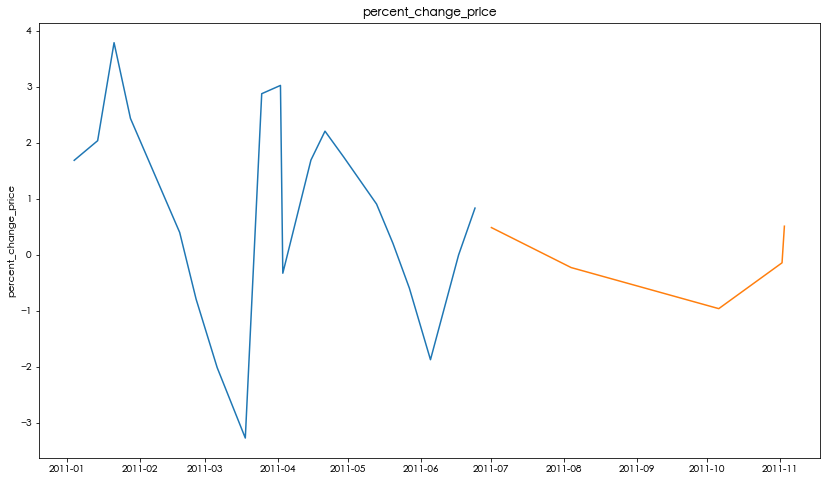

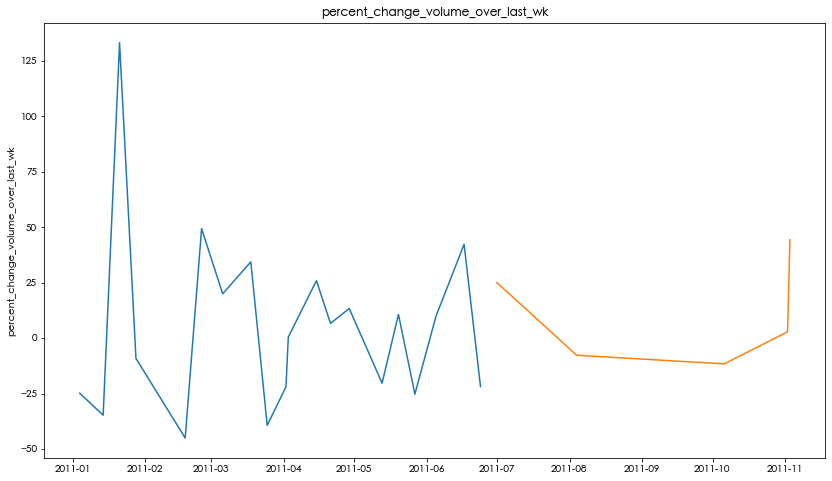

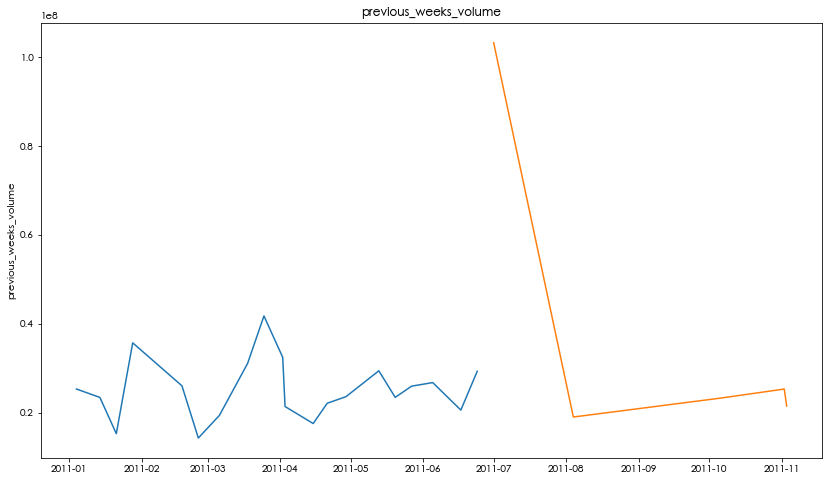

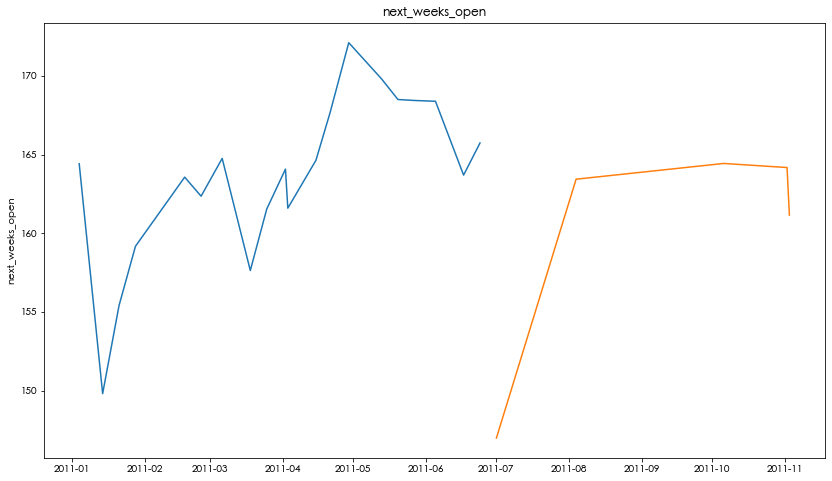

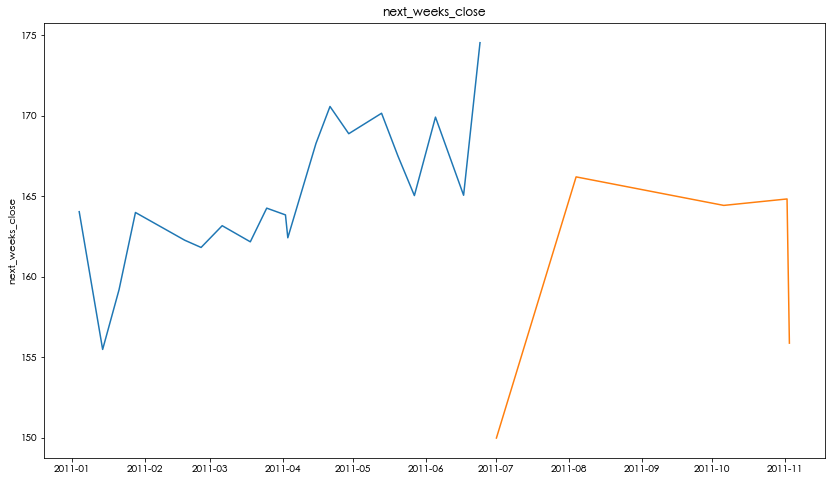

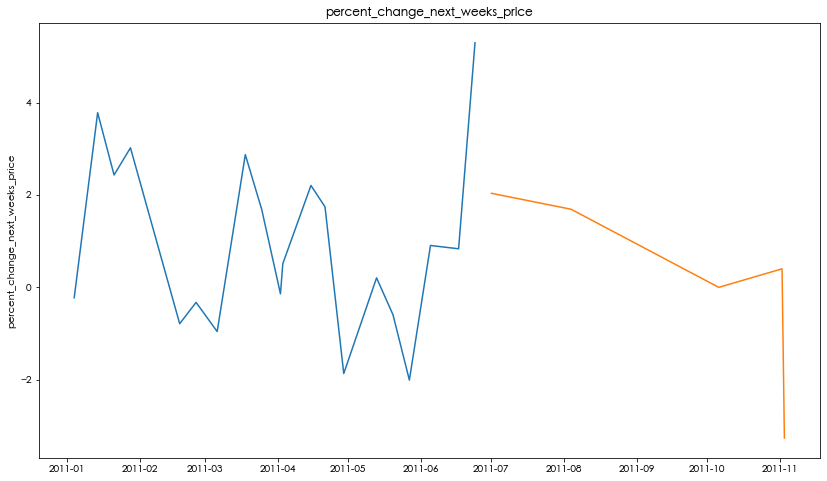

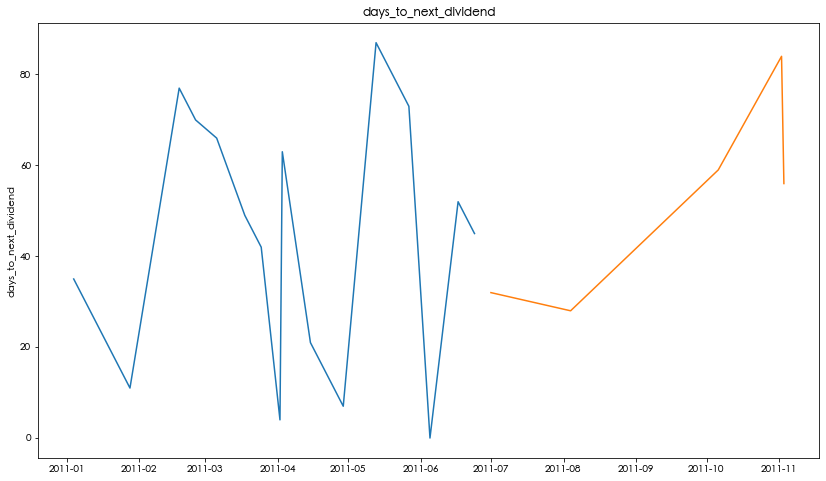

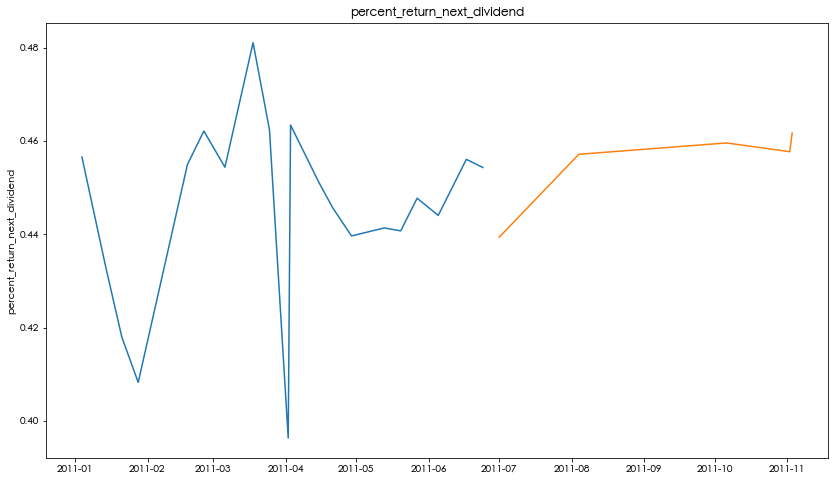

In [117]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [118]:
train['month'] = train.index.strftime('%m-%b')

/var/folders/m0/l9vd9d0d2lq24z05vjb54jqw0000gn/T/ipykernel_47669/635398301.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
train.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,month
date,,,,,,,,,,,,,,,,
2011-01-04,2.0,IBM,161.54,164.42,161.12,164.27,19081936.0,1.689980,-24.820375,25381792.0,164.42,164.05,-0.225033,35.0,0.456565,01-Jan
2011-01-14,1.0,IBM,147.00,150.00,146.00,150.00,15335348.0,2.040820,-34.723320,23492843.0,149.82,155.50,3.791220,25.0,0.433333,01-Jan
2011-01-21,1.0,IBM,149.82,156.78,149.38,155.50,35770931.0,3.791220,133.258032,15335348.0,155.42,159.21,2.438550,18.0,0.418006,01-Jan
2011-01-28,1.0,IBM,155.42,164.35,155.33,159.21,32510483.0,2.438550,-9.114798,35770931.0,159.18,164.00,3.028020,11.0,0.408266,01-Jan
2011-02-18,1.0,IBM,164.18,164.84,162.52,164.84,14352613.0,0.401998,-45.023370,26106753.0,163.57,162.28,-0.788653,77.0,0.454987,02-Feb


In [125]:
train.tail()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,month
date,,,,,,,,,,,,,,,,
2011-05-20,2.0,IBM,169.81,171.41,166.53,170.16,26027660.0,0.206113,10.729929,23505533.0,168.50,167.50,-0.593472,80.0,0.440762,05-May
2011-05-27,2.0,IBM,168.50,168.60,165.90,167.50,19453763.0,-0.593472,-25.257349,26027660.0,168.44,165.05,-2.012590,73.0,0.447761,05-May
2011-06-05,2.0,IBM,172.11,173.54,167.50,168.89,29480567.0,-1.870900,9.880652,26829625.0,168.39,169.92,0.908605,0.0,0.444076,06-Jun
2011-06-17,2.0,IBM,164.44,165.10,161.52,164.44,29390025.0,0.000000,42.351606,20646079.0,163.70,165.07,0.836897,52.0,0.456093,06-Jun
2011-06-24,2.0,IBM,163.70,166.81,163.59,165.07,22984546.0,0.836897,-21.794738,29390025.0,165.74,174.54,5.309520,45.0,0.454353,06-Jun


<AxesSubplot:xlabel='month', ylabel='close'>

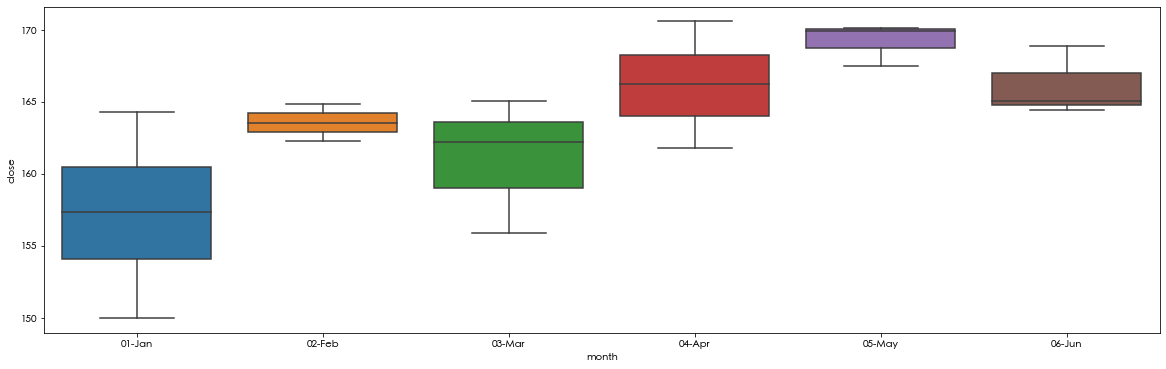

In [122]:
sns.boxplot(data = train, x = 'month', y = 'close')

<AxesSubplot:xlabel='month', ylabel='percent_change_price'>

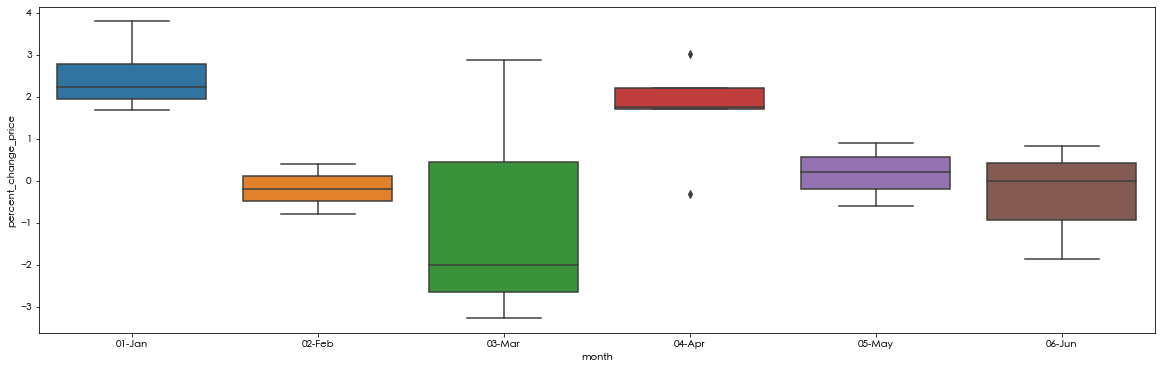

In [123]:
sns.boxplot(data = train, x = 'month', y = 'percent_change_price')

<AxesSubplot:xlabel='month', ylabel='volume'>

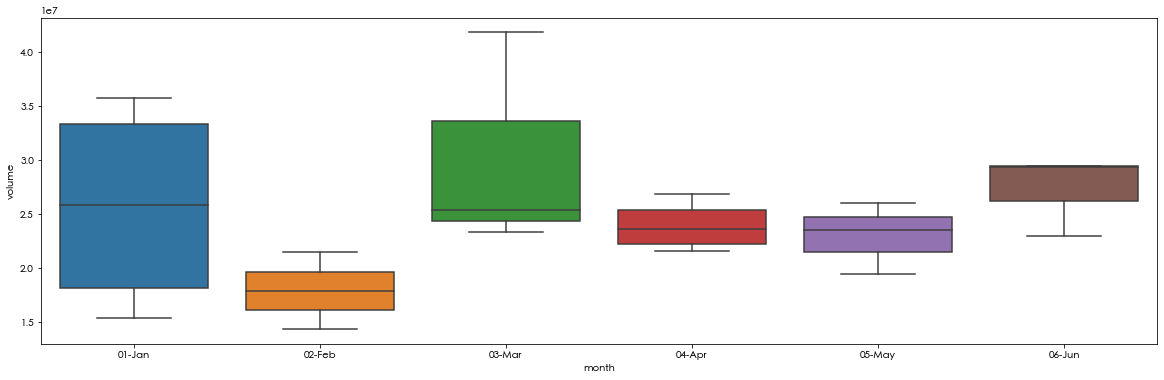

In [124]:
sns.boxplot(data = train, x = 'month', y = 'volume')

In [126]:
train['weekday'] = train.index.strftime('%w-%a')

<AxesSubplot:xlabel='weekday', ylabel='volume'>

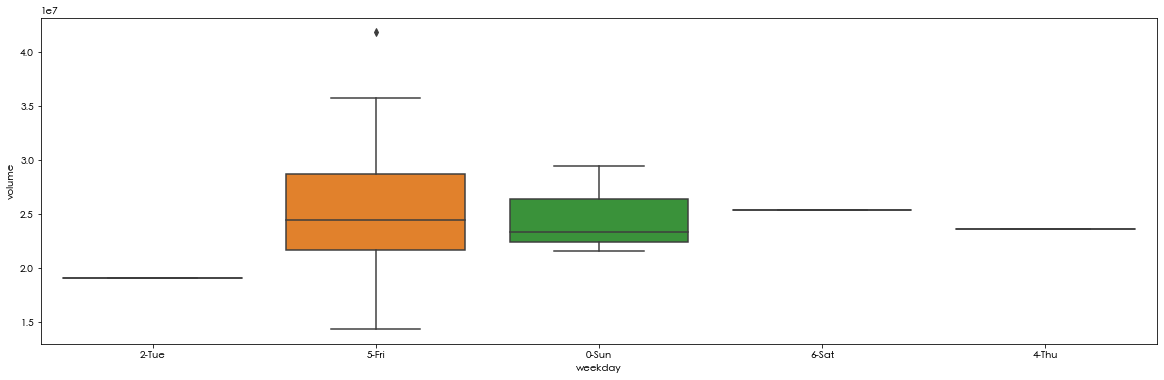

In [127]:
sns.boxplot(data = train, x = 'weekday', y = 'volume')

<AxesSubplot:xlabel='weekday', ylabel='percent_change_price'>

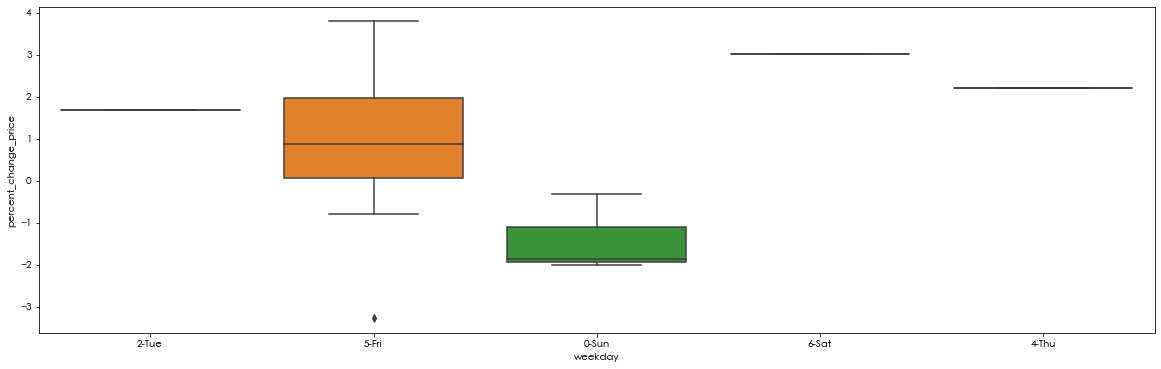

In [128]:
sns.boxplot(data = train, x = 'weekday', y = 'percent_change_price')

<AxesSubplot:xlabel='weekday', ylabel='open'>

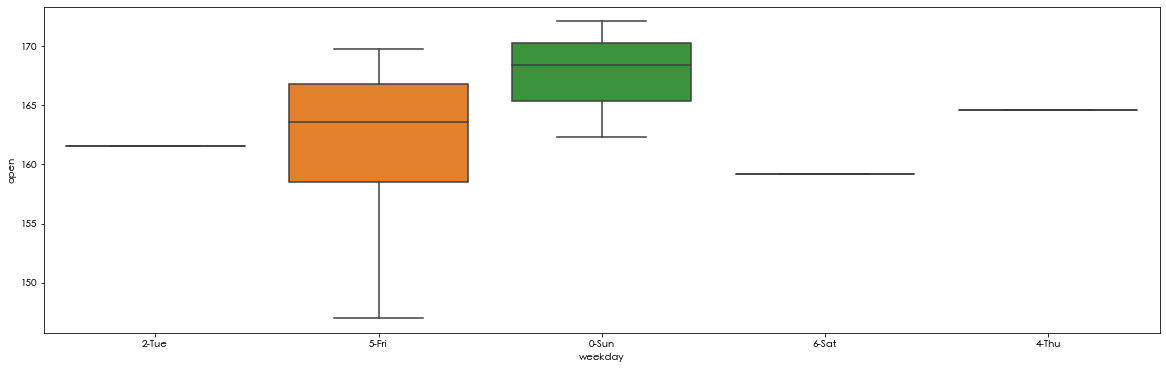

In [129]:
sns.boxplot(data = train, x = 'weekday', y = 'open')

<AxesSubplot:xlabel='weekday', ylabel='close'>

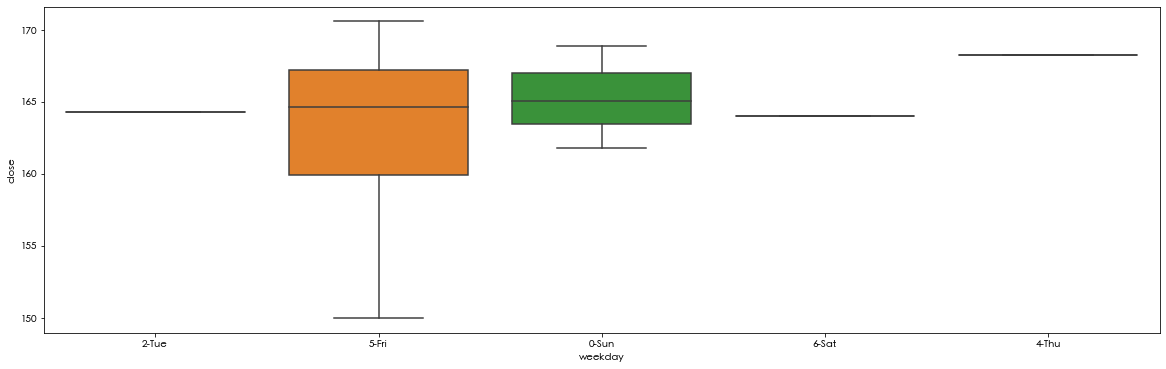

In [130]:
sns.boxplot(data = train, x = 'weekday', y = 'close')

In [154]:
train['day'] = train.index.strftime('%d %b %a')

<AxesSubplot:xlabel='day', ylabel='close'>

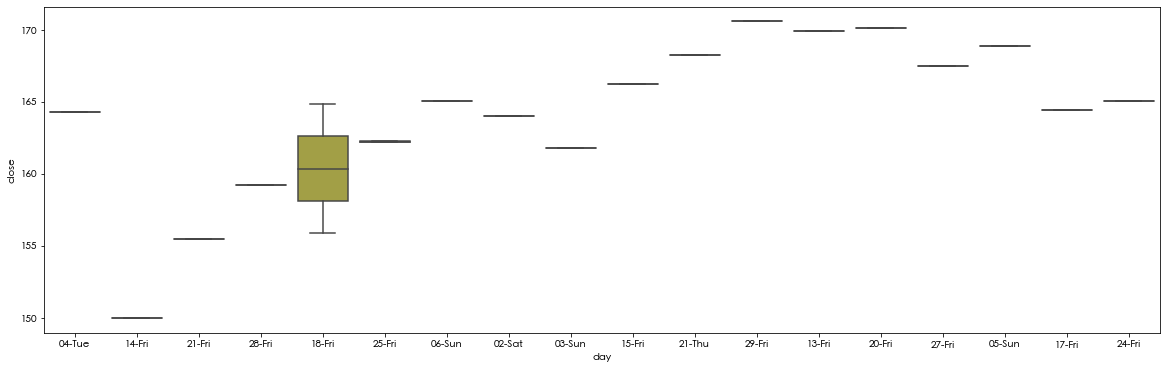

In [132]:
sns.boxplot(data = train, x = 'day', y = 'close')

<AxesSubplot:xlabel='day', ylabel='open'>

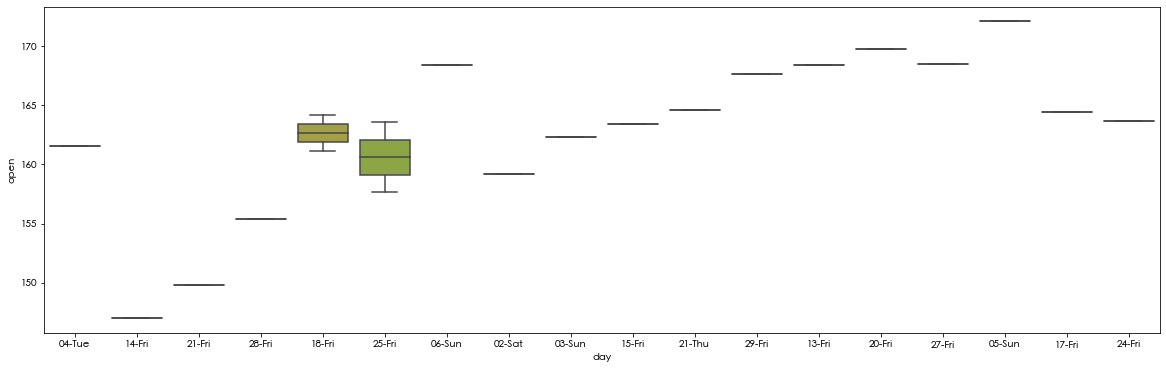

In [133]:
sns.boxplot(data = train, x = 'day', y = 'open')

<AxesSubplot:xlabel='day', ylabel='percent_change_price'>

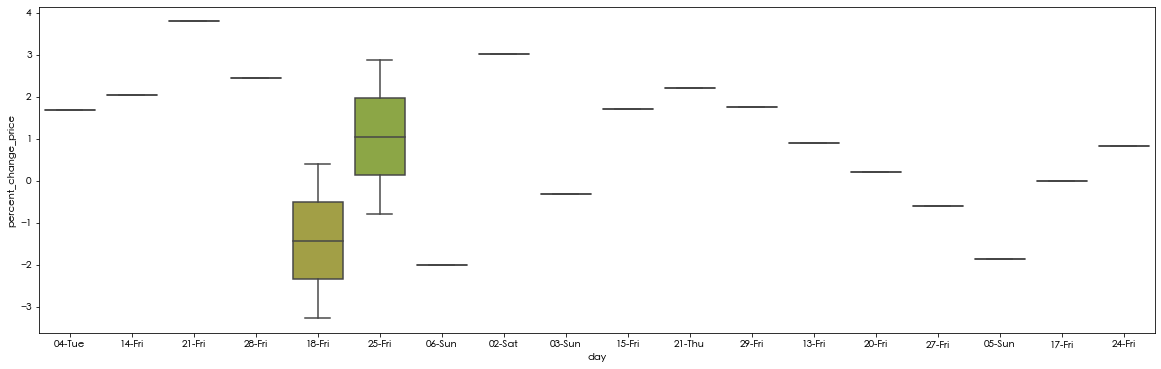

In [134]:
sns.boxplot(data = train, x = 'day', y = 'percent_change_price')

<AxesSubplot:xlabel='day', ylabel='volume'>

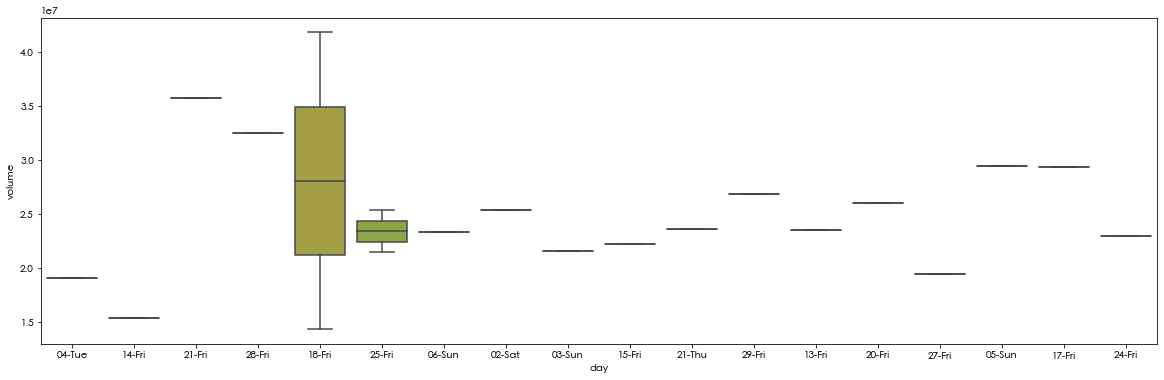

In [135]:
sns.boxplot(data = train, x = 'day', y = 'volume')

In [136]:
train.head(1)

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,month,weekday,day
date,,,,,,,,,,,,,,,,,,
2011-01-04,2.0,IBM,161.54,164.42,161.12,164.27,19081936.0,1.68998,-24.820375,25381792.0,164.42,164.05,-0.225033,35.0,0.456565,01-Jan,2-Tue,04-Tue


<AxesSubplot:xlabel='month', ylabel='percent_change_volume_over_last_wk'>

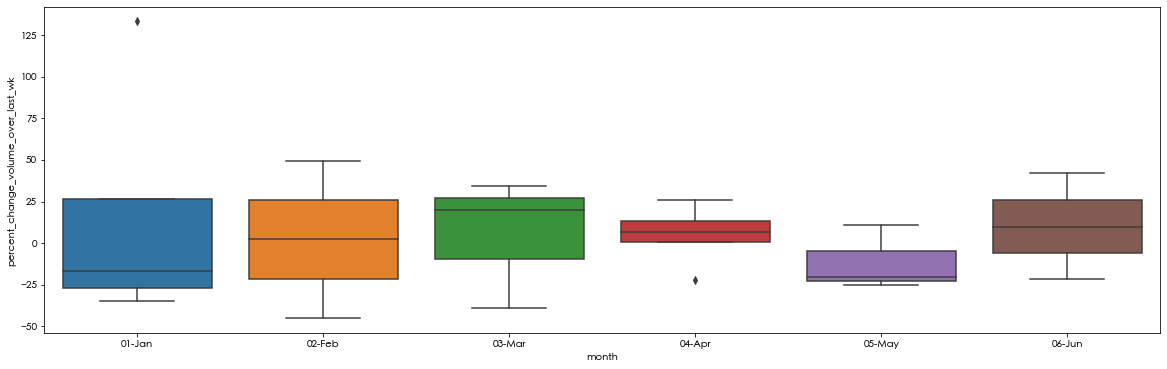

In [138]:
sns.boxplot(data = train, x = 'month', y = 'percent_change_volume_over_last_wk')

In [137]:
sns.boxplot(data = train, x = 'month', y = 'percent_change_volume_over_last_wk')

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-07-01,1.0,IBM,147.21,148.86,146.64,147.93,23492843.0,0.489097,25.083748,103320396.0,147.00,150.00,2.040820,32.0,0.439397
2011-08-04,2.0,IBM,164.42,164.75,163.16,164.05,17615408.0,-0.225033,-7.685426,19081936.0,163.44,166.21,1.694810,28.0,0.457178
2011-10-06,2.0,IBM,164.76,165.96,162.87,163.18,20646079.0,-0.958971,-11.579855,23349972.0,164.44,164.44,0.000000,59.0,0.459615
2011-11-02,1.0,IBM,164.08,166.25,163.18,163.85,26106753.0,-0.140176,2.874986,25377163.0,164.18,164.84,0.401998,84.0,0.457736
2011-11-03,1.0,IBM,161.60,167.72,158.85,162.43,31119857.0,0.513614,44.413600,21549118.0,161.16,155.89,-3.270040,56.0,0.461737


In [142]:
fast_pearson(train.percent_change_next_weeks_price , train.percent_change_price)

correlation is 0.22126903649052493
P-value is 0.3484900501159032
We fail to reject the null


# is there a relationship between percent change and volume?

In [148]:
fast_pearson(train.percent_change_price , train.volume)

correlation is -0.14059832262370392
P-value is 0.5543612009485258
We fail to reject the null


In [149]:
fast_pearson(train.percent_change_price , train.previous_weeks_volume)

correlation is 0.15586809131613838
P-value is 0.511689579963589
We fail to reject the null


### there is not a significant relationship between percent change and volume

In [150]:
def correlations(train):
    plt.figure(figsize=(20, 12))
    sns.heatmap(train.corr(), cmap='Oranges', annot=True)
    plt.title('Train data Columns Correlation', fontsize=14)
    plt.show()

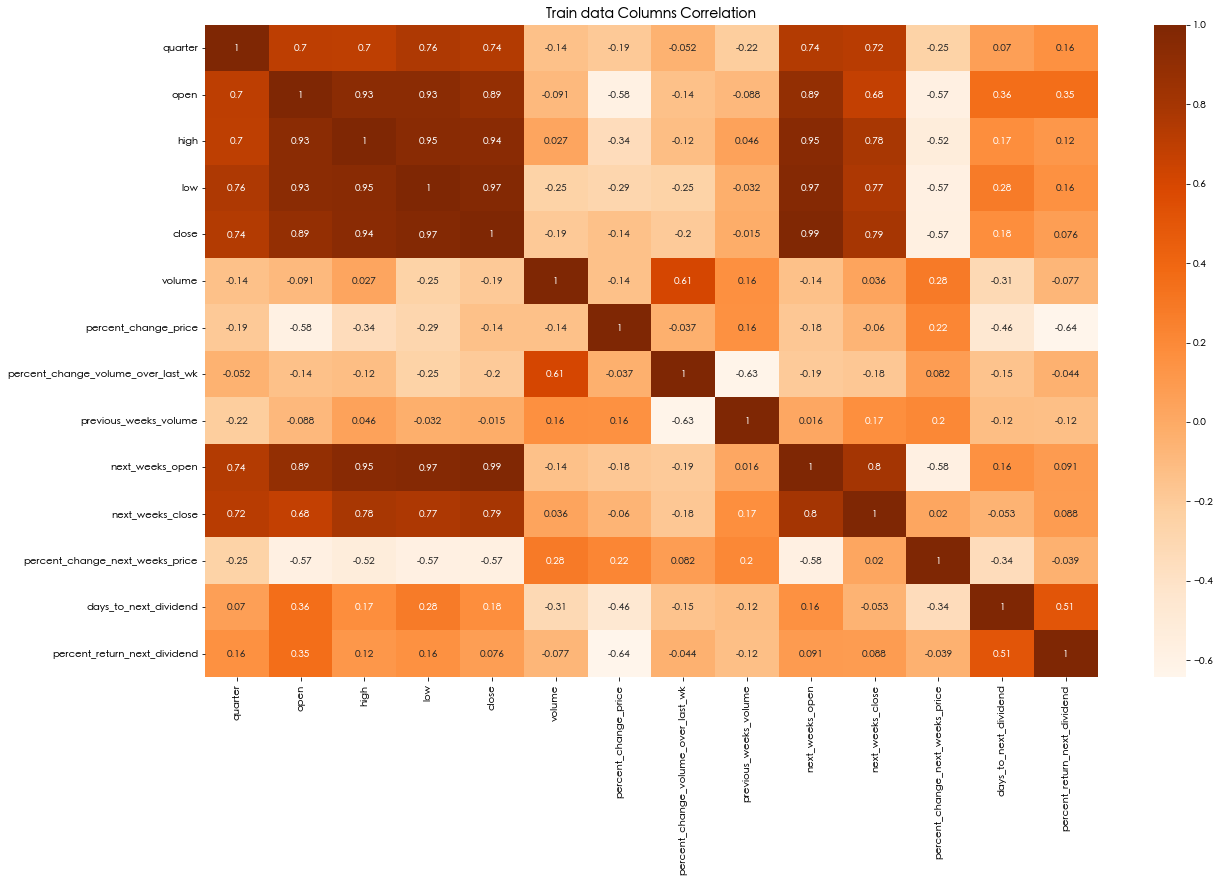

In [152]:
correlations(train)

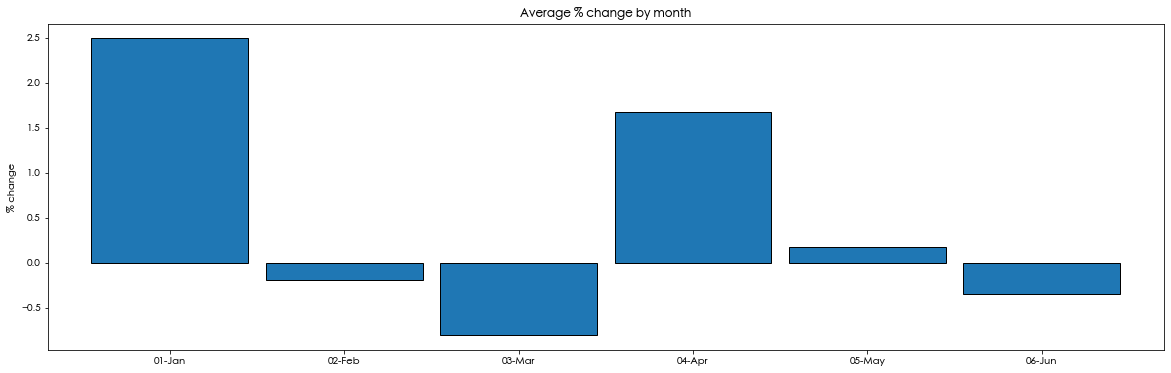

In [156]:
ax = train.groupby(train.month).percent_change_price.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average % change by month', xlabel='', ylabel='% change')
plt.show()

## seems like a bit of possible seasonality

In [157]:
y = train.percent_change_price
y.head()

date
2011-01-04    1.689980
2011-01-14    2.040820
2011-01-21    3.791220
2011-01-28    2.438550
2011-02-18    0.401998
Name: percent_change_price, dtype: float64

<AxesSubplot:xlabel='date'>

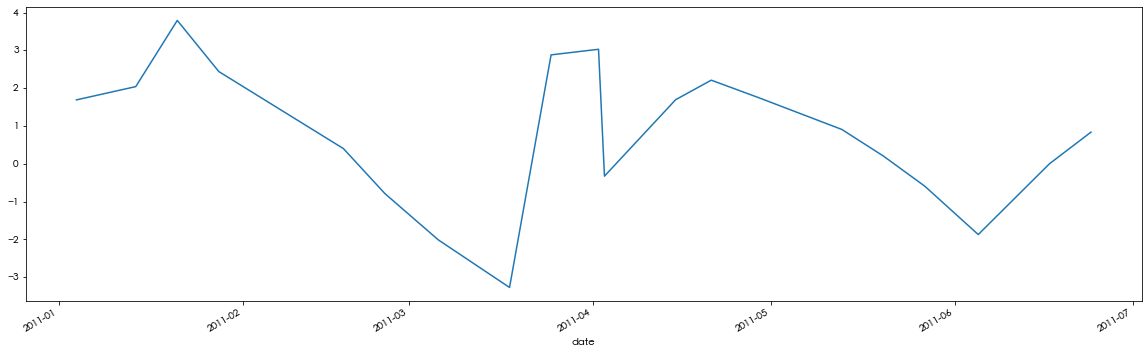

In [158]:
y.plot()

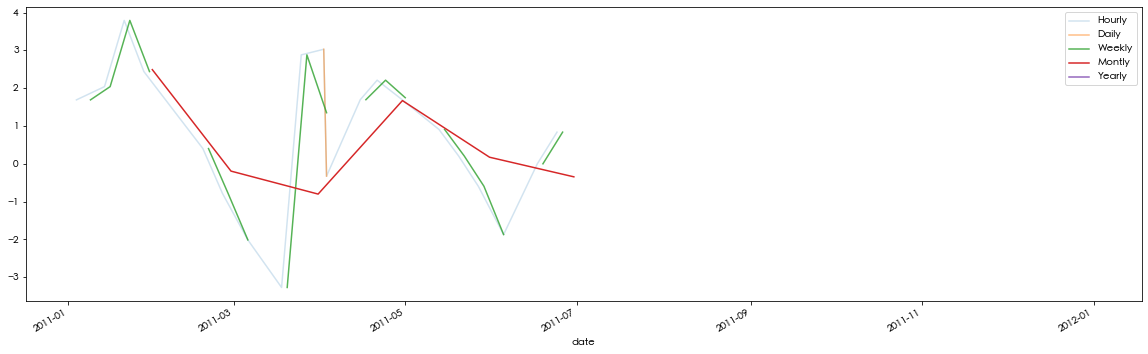

In [159]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

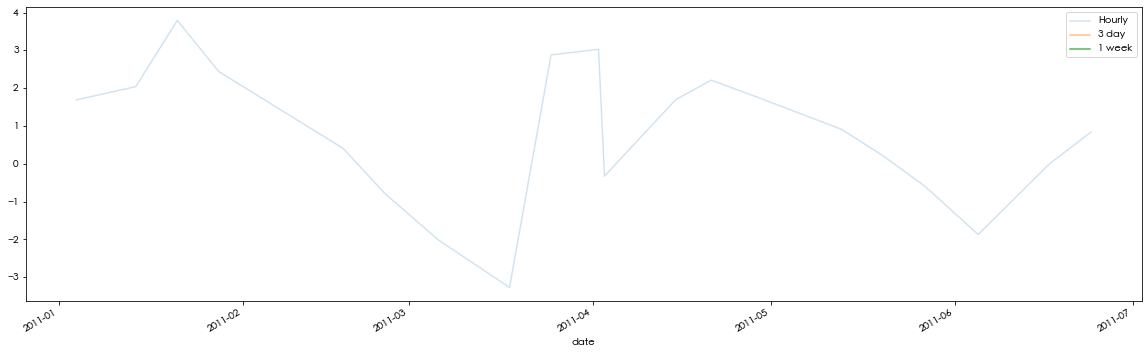

In [160]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

<AxesSubplot:title={'center':'price change differential over time'}, xlabel='date'>

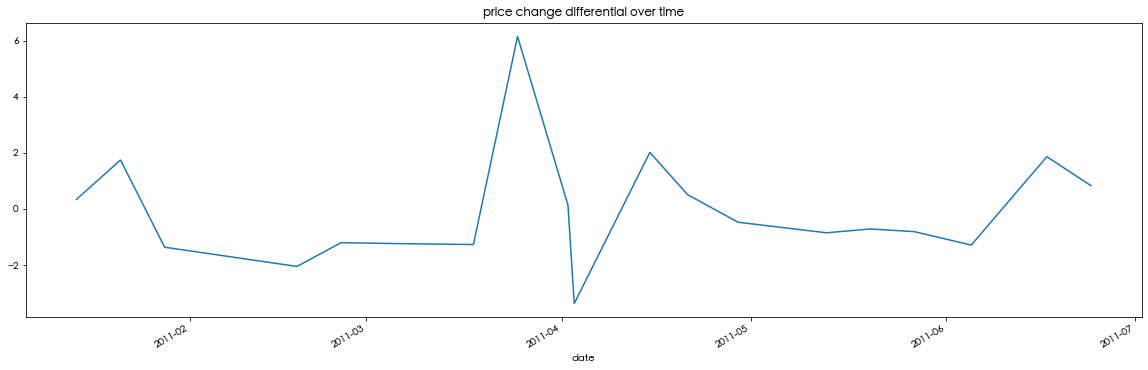

In [163]:
y.diff().plot(title='price change differential over time')

<AxesSubplot:title={'center':'% change over time'}, xlabel='date'>

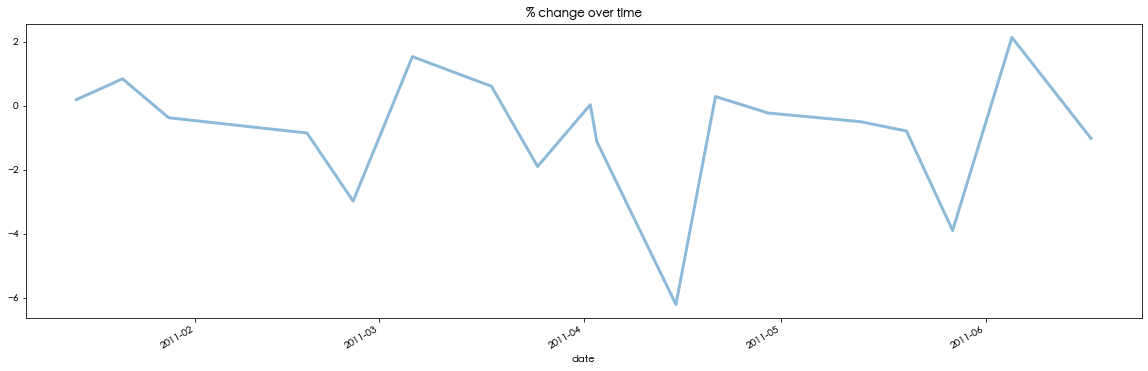

In [164]:
(y.diff() / y.shift()).plot(alpha=.5, lw=3, title='% change over time')

In [165]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

date,2011
date,
1,2.490143
2,-0.193328
3,-0.800883
4,1.670993
5,0.173749
6,-0.344668


<AxesSubplot:xlabel='date'>

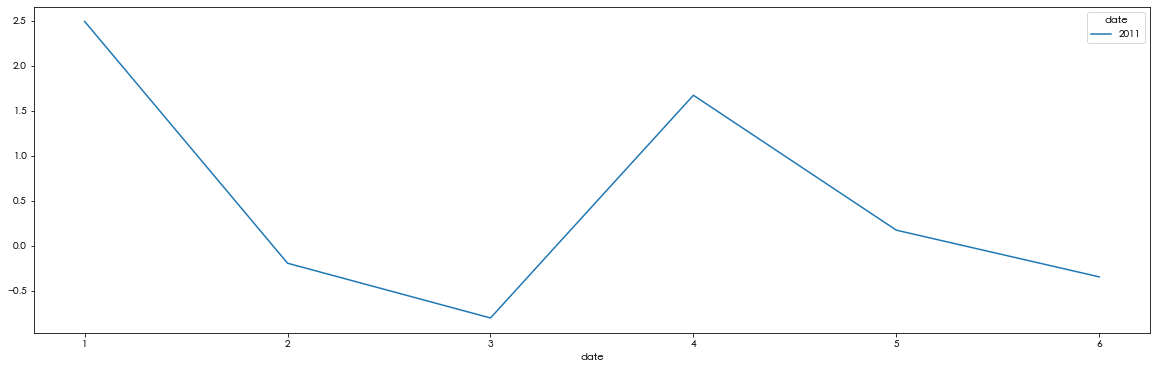

In [166]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

In [172]:
train['y(t + 1)'] = train.percent_change_price.shift(-1)

In [173]:
train

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,month,weekday,day,y(t + 1)
date,,,,,,,,,,,,,,,,,,,
2011-01-04,2.0,IBM,161.54,164.42,161.12,164.27,19081936.0,1.689980,-24.820375,25381792.0,164.42,164.05,-0.225033,35.0,0.456565,01-Jan,2-Tue,04 Jan Tue,2.040820
2011-01-14,1.0,IBM,147.00,150.00,146.00,150.00,15335348.0,2.040820,-34.723320,23492843.0,149.82,155.50,3.791220,25.0,0.433333,01-Jan,5-Fri,14 Jan Fri,3.791220
2011-01-21,1.0,IBM,149.82,156.78,149.38,155.50,35770931.0,3.791220,133.258032,15335348.0,155.42,159.21,2.438550,18.0,0.418006,01-Jan,5-Fri,21 Jan Fri,2.438550
2011-01-28,1.0,IBM,155.42,164.35,155.33,159.21,32510483.0,2.438550,-9.114798,35770931.0,159.18,164.00,3.028020,11.0,0.408266,01-Jan,5-Fri,28 Jan Fri,0.401998
2011-02-18,1.0,IBM,164.18,164.84,162.52,164.84,14352613.0,0.401998,-45.023370,26106753.0,163.57,162.28,-0.788653,77.0,0.454987,02-Feb,5-Fri,18 Feb Fri,-0.788653
2011-02-25,1.0,IBM,163.57,164.26,159.03,162.28,21443811.0,-0.788653,49.407017,14352613.0,162.36,161.83,-0.326435,70.0,0.462164,02-Feb,5-Fri,25 Feb Fri,-2.012590
2011-03-06,2.0,IBM,168.44,169.89,164.13,165.05,23349972.0,-2.012590,20.028048,19453763.0,164.76,163.18,-0.958971,66.0,0.454408,03-Mar,0-Sun,06 Mar Sun,-3.270040
2011-03-18,1.0,IBM,161.16,161.98,151.71,155.89,41827781.0,-3.270040,34.408654,31119857.0,157.64,162.18,2.879980,49.0,0.481108,03-Mar,5-Fri,18 Mar Fri,2.879980
2011-03-25,1.0,IBM,157.64,162.74,157.07,162.18,25381792.0,2.879980,-39.318340,41827781.0,161.54,164.27,1.689980,42.0,0.462449,03-Mar,5-Fri,25 Mar Fri,3.028020


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

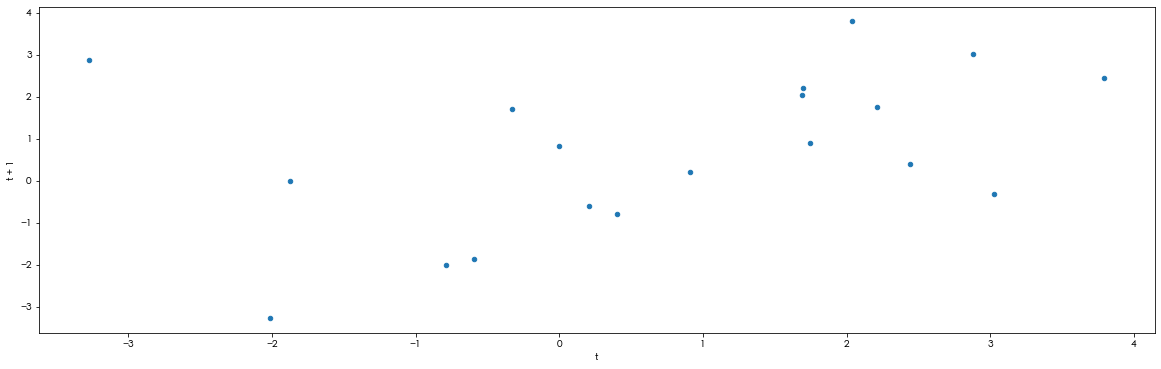

In [174]:
ax = train.plot.scatter(x='percent_change_price', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

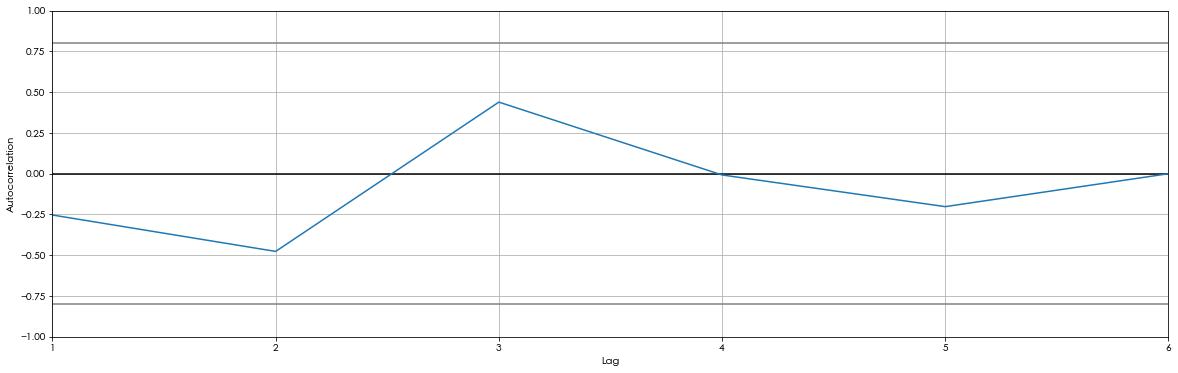

In [179]:
pd.plotting.autocorrelation_plot(train.percent_change_price.resample('M').mean())

In [182]:
import statsmodels.api as sm

ValueError: x must have 2 complete cycles requires 24 observations. x only has 6 observation(s)

# Summary:

I've finally narrowed the scope ddown to time series on IBM. while there is not a whole lot of data @ 25 points for both trrain and test, there are still some relationships and a minor bit of seasonality

my target variable is percent change price. In my opinion that variable will have the Best functionality for a forecasting model.